In [1]:
%load_ext sql

In [2]:
%sql sqlite:///./database/eleclog_copy.db

'Connected: @./database/eleclog_copy.db'

In [3]:
%sql select * from readings limit 1;

 * sqlite:///./database/eleclog_copy.db
Done.


timestamp,demand,demand_max,anm_generated,non_anm_generated,total_generation_capacity
2019-01-16 14:36:03,23.22,35.7,12.478,17.782,57.099999999999994


In [4]:
%%sql 
SELECT non_anm_generated, COUNT(*) count 
FROM readings 
GROUP BY non_anm_generated 
order by count desc
limit 10

 * sqlite:///./database/eleclog_copy.db
Done.


non_anm_generated,count
1.614,29225
0,1421
0.361,244
0.256,204
0.293,188
0.25,178
0.34,165
0.24,164
0.33,160
0.359,155


In [5]:
import matplotlib
import pandas
import datetime
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,8]

In [6]:
data  = %sql SELECT * FROM readings;
data =  data.DataFrame()
data['dt'] = pandas.to_datetime(data['timestamp'])

 * sqlite:///./database/eleclog_copy.db
Done.


In [7]:
data['total_generated'] = data['non_anm_generated']+data['anm_generated']

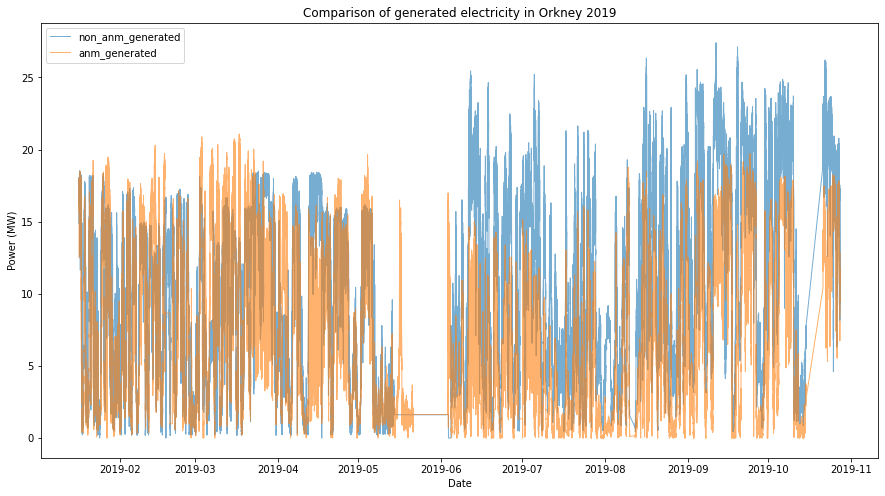

In [8]:
matplotlib.pyplot.plot_date(data['dt'],data['non_anm_generated'], xdate=True, ydate=False, fmt = ' ',linestyle='solid', linewidth=1, alpha =0.6, markersize=0.1)
matplotlib.pyplot.plot_date(data['dt'],data['anm_generated'], xdate=True, ydate=False, fmt = ' ',linestyle='solid', linewidth=1,alpha =0.6, markersize=0.1)
# matplotlib.pyplot.plot_date(data['dt'],data['total_generated'], xdate=True, ydate=False, fmt = '.',linestyle='solid', linewidth=1,alpha =0.4, markersize=0.1)
matplotlib.pyplot.title('Comparison of generated electricity in Orkney 2019')
matplotlib.pyplot.xlabel('Date')
matplotlib.pyplot.ylabel('Power (MW)')
matplotlib.pyplot.legend(['non_anm_generated','anm_generated','total_generated'])

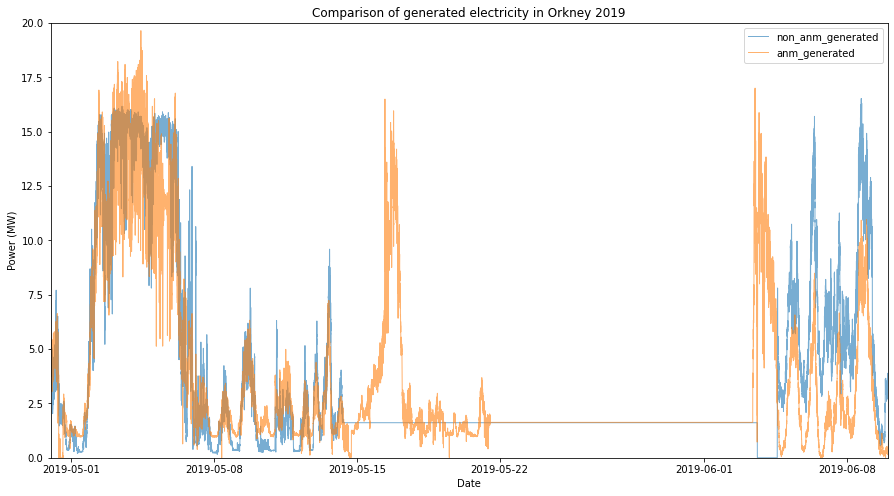

In [9]:
xstart= datetime.date(2019,4,30)
xend =datetime.date(2019,6,10)

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot_date(data['dt'],data['non_anm_generated'], xdate=True, ydate=False, fmt = ' ',linestyle='solid', linewidth=1, alpha =0.6, markersize=0.1)
ax.plot_date(data['dt'],data['anm_generated'], xdate=True, ydate=False, fmt = ' ',linestyle='solid', linewidth=1,alpha =0.6, markersize=0.1)

# set the limits
ax.set_xlim([xstart, xend])
ax.set_ylim([0,20])

ax.set_title('Comparison of generated electricity in Orkney 2019')
ax.set_xlabel('Date')
ax.set_ylabel('Power (MW)')
ax.legend(['non_anm_generated','anm_generated','total_generated'])

# display the plot
matplotlib.pyplot.show()

In [10]:
%%sql
SELECT min(timestamp), max(timestamp) from readings
where non_anm_generated = 1.614 and substr(timestamp, 6, 5) > '04-31' and substr(timestamp, 6, 5) < '06-14'

 * sqlite:///./database/eleclog_copy.db
Done.


min(timestamp),max(timestamp)
2019-05-07 07:58:06,2019-06-09 12:49:05


In [11]:
%%sql 
SELECT anm_generated, COUNT(*) count 
    FROM readings 
    GROUP BY anm_generated 
    order by count desc
    limit 10

 * sqlite:///./database/eleclog_copy.db
Done.


anm_generated,count
1.629,18528
0,3465
8.655,2684
1.331,1269
0.988,1258
1.330999,490
1.330998,367
1.331001,183
14.48,154
13.613,152


In [12]:
%%sql
SELECT min(timestamp), max(timestamp) from readings
where anm_generated = 1.629 and substr(timestamp, 6, 5) > '05-19' and substr(timestamp, 6, 5) < '06-05'

 * sqlite:///./database/eleclog_copy.db
Done.


min(timestamp),max(timestamp)
2019-05-21 10:19:06,2019-06-03 09:29:05


In [13]:
%%sql 
SELECT non_anm_generated, COUNT(*) count 
    FROM readings 
    GROUP BY non_anm_generated 
    order by count desc
    limit 10

 * sqlite:///./database/eleclog_copy.db
Done.


non_anm_generated,count
1.614,29225
0,1421
0.361,244
0.256,204
0.293,188
0.25,178
0.34,165
0.24,164
0.33,160
0.359,155


In [14]:
%%sql
SELECT 1.614, min(timestamp), max(timestamp) from readings
where non_anm_generated = 1.614 and substr(timestamp, 6, 5) > '04-31' and substr(timestamp, 6, 5) < '06-04'

 * sqlite:///./database/eleclog_copy.db
Done.


1.614,min(timestamp),max(timestamp)
1.614,2019-05-07 07:58:06,2019-06-03 14:47:05


In [15]:
%%sql
SELECT 0, min(timestamp), max(timestamp) from readings
where non_anm_generated = 0 and substr(timestamp, 6, 5) > '04-31' and substr(timestamp, 6, 5) < '06-14'

 * sqlite:///./database/eleclog_copy.db
Done.


0,min(timestamp),max(timestamp)
0,2019-06-03 14:48:05,2019-06-04 14:17:05


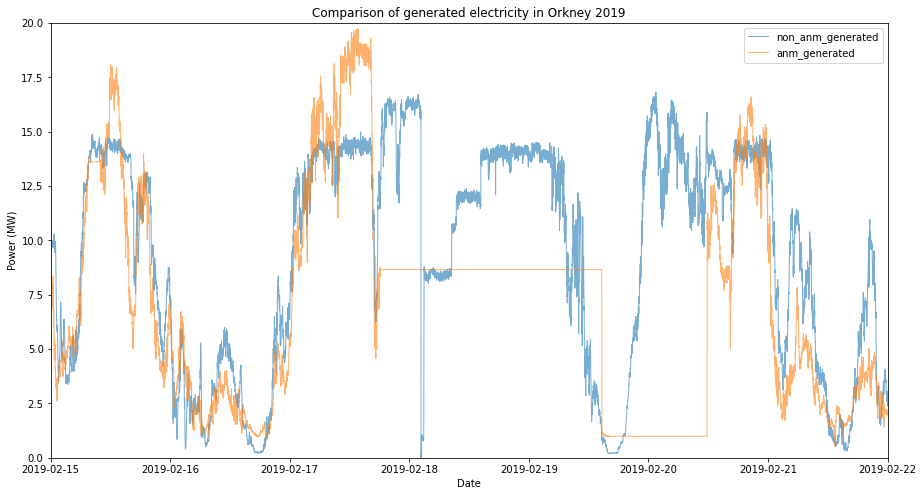

In [16]:
xstart= datetime.date(2019,2,15)
xend =datetime.date(2019,2,22)

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot_date(data['dt'],data['non_anm_generated'], xdate=True, ydate=False, fmt = ' ',linestyle='solid', linewidth=1, alpha =0.6, markersize=0.1)
ax.plot_date(data['dt'],data['anm_generated'], xdate=True, ydate=False, fmt = ' ',linestyle='solid', linewidth=1,alpha =0.6, markersize=0.1)

# set the limits
ax.set_xlim([xstart, xend])
ax.set_ylim([0,20])

ax.set_title('Comparison of generated electricity in Orkney 2019')
ax.set_xlabel('Date')
ax.set_ylabel('Power (MW)')
ax.legend(['non_anm_generated','anm_generated','total_generated'])

# display the plot
matplotlib.pyplot.show()

check fo odd demand readings

In [17]:
%%sql 
SELECT anm_generated, COUNT(*) count 
    FROM readings 
    where substr(timestamp, 6, 5) > '02-17' and substr(timestamp, 6, 5) < '02-21'
    GROUP BY anm_generated 
    order by count desc
    limit 6    

 * sqlite:///./database/eleclog_copy.db
Done.


anm_generated,count
8.655,2316
0.988,1170
0.972,4
0.989,4
0.977,3
1.004,3


In [18]:
%%sql 
SELECT demand, COUNT(*) count 
    FROM readings 
    WHERE demand > 30
    GROUP BY demand 
    order by demand desc
    limit 20

 * sqlite:///./database/eleclog_copy.db
Done.


demand,count
39.69,1
32.38,1
32.26,1
32.23,1
32.2,1
32.19,1
32.09,1
32,1
31.9,1
31.79,1


Check demand max

Demand max is calculated from the SSEN web page as the sum of current demand and the differnce to  the SEN estiomated maximum demand.  This is because of the way the graphic is drawn.

We can see that the majority of the values are as similar, 383661 at 35.7MW (Mega Watts), and there is some rounding error for the other values. There is on spurious value  of 39.69 on 2019-04-08. 

In [19]:
%%sql
SELECT demand_max,  COUNT(*) count, min(timestamp), max(timestamp) from readings
GROUP BY demand_max

 * sqlite:///./database/eleclog_copy.db
Done.


demand_max,count,min(timestamp),max(timestamp)
35.699999999999996,11865,2019-01-16 14:54:04,2019-10-27 21:19:05
35.7,383717,2019-01-16 14:36:03,2019-10-27 21:48:06
39.69,1,2019-04-08 04:14:05,2019-04-08 04:14:05
